In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

mu = 0.001
epochs = 3
batch_size = 20

np.random.seed(0)

# Read in data
lines_data = []
with open('new.txt', 'rt') as in_file:
    for line in in_file:
        lines_data.append(line.rstrip('\n'))

data_list = []
for line in lines_data:
    label = int(re.split(':', line)[0])

    parsed_input = re.split('1:', line)[1].strip()
    parsed_input = parsed_input.replace("[", "")
    parsed_input = parsed_input.replace("]", "")
    parsed_input_list = parsed_input.split(',')
    inputs = [float(el) for el in parsed_input_list]
    row = [label] + inputs
    data_list.append(row)
data = np.asarray(data_list)

L = data[:,0] # labels of samples

# Generate random weights of 256 + 256 + 256 AND 1 for initial bias
W = np.random.random_sample((256 * 3) + 1,) - np.random.random_sample()

rows = data.shape[0]
cols = data.shape[1]

print('first row')
print(rows)


first row
5699


i: 0
Charge: -26.642143
Predict: 0
Error: -1.000000 charge: -26.642143 predict: 0.000000 L[i]: 1.000000
i: 1
Charge: -24.844072
Predict: 0
Error: -1.000000 charge: -24.844072 predict: 0.000000 L[i]: 1.000000
i: 2
Charge: -81.015557
Predict: 0
Error: -1.000000 charge: -81.015557 predict: 0.000000 L[i]: 1.000000
i: 3
Charge: -24.122409
Predict: 0
Error: -1.000000 charge: -24.122409 predict: 0.000000 L[i]: 1.000000
i: 4
Charge: -27.063351
Predict: 0
Error: -1.000000 charge: -27.063351 predict: 0.000000 L[i]: 1.000000
i: 5
Charge: -23.149098
Predict: 0
Error: -1.000000 charge: -23.149098 predict: 0.000000 L[i]: 1.000000
i: 6
Charge: -14.479205
Predict: 0
Error: -1.000000 charge: -14.479205 predict: 0.000000 L[i]: 1.000000
i: 7
Charge: -24.002285
Predict: 0
Error: -1.000000 charge: -24.002285 predict: 0.000000 L[i]: 1.000000
i: 8
Charge: -67.562727
Predict: 0
Error: -1.000000 charge: -67.562727 predict: 0.000000 L[i]: 1.000000
i: 9
Charge: -57.923217
Predict: 0
Error: -1.000000 charge: -57.

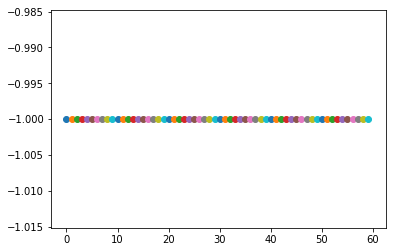

In [55]:
total_error = []
batch_accuracy = []
for j in range(epochs):
    accuracy = 0
    for i in range(batch_size):
        charge = W[0] + np.dot(data[i, 1:], W[1:])
        print('i: %d' % i)
        print("Charge: %f" % charge)
        predict = 1 if charge > 0 else 0
        print("Predict: %d" % predict)
        
        
        if predict == L[i]:
            accuracy += 1
        else:
            Error = predict - L[i]
            W_t = W
            # X_t = np.concatenate([:, 1], data[i, 1:])
            X_t  = np.concatenate(([1], data[i,1:]))
            # W_t = np.multiply(mu, np.multiply(Error, data[i, 1:]))
            W_t = np.multiply(mu, np.multiply(Error, X_t))
            W = np.subtract(W, W_t)
            total_error.append(Error)
            print("Error: %f charge: %f predict: %f L[i]: %f" % (Error, charge, predict, L[i]))
            # plt.plot (np.arange (-2.5,2.5,0.1), -W[0]/W[2] - W[1]/W[2] * np.arange(-2.5,2.5,0.1))
    print("Accuracy: %f" % (float(accuracy) / rows))
    
for count, value in enumerate(total_error):
    plt.scatter(count, value)
plt.show()